In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Needed Constants

In [25]:
M_Cs137,  Lamb_Cs137,  D_water_Cs137, Y_Cs137 = 137, np.log(2)/(30*365*3600*24), 2.056e-9, 0.059#9e-10#6e-12 #2.056e-9#6e-12

# Class for Release Rate

In [125]:
import numpy as np
import matplotlib.pyplot as plt

class ReleaseRateCalculation:
    def __init__(self, M_Isotope, Lamb, T_gas):
        self.M_Isotope = M_Isotope       # Isotope mass
        self.Lamb = Lamb                 # Decay constant
        self.T_gas = T_gas
    

    def Finite_difference_scheme_gasses(self, M, N, Lamb, D, steady_concentration, Defect_Depth):
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
        L = 0.00058 - Defect_Depth                                      # Cladding thickness
        M_gas = M
        A = 1.5e-8
        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)

        x = np.linspace(0, L, N+1)

        for j in range(M):
            for i in range(1, N):
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
            
            u[0, j+1] = u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - self.Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            R_t[j+1] = -J * A
            
        return u, R_t[-1]

def Exp_measurement_50mL_Sample(Lamb, release, sample_size, volume, time):
    return Lamb * release * time * sample_size / volume *0.839 *3600


# Constants

In [126]:
# Importing the diffusion coefficients

Defect_Depth = 0.0001
T_gas = 365*4*24*3600 #4 Years

sample_size = 50e-6    #m3
volume      = 0.065     #m3
time        = 5*60  #s



# Calculation

In [127]:
# Varying defect depths from 0 to the original Lamb_Cs137
L = 0.00058
defect_depths = np.linspace(0, L, 50)
Cs137_meas_values = []
Cs137_meas_values_lower = []
Cs137_meas_values_upper = []

N = 20
M = 10000

Estimated_Diff_Coeff_I = 5e-17
Estimated_Diff_Coeff_Lower = 3e-17
Estimated_Diff_Coeff_Upper = 7e-17

for Defect_Depth in defect_depths:
    Cs137 = ReleaseRateCalculation(M_Cs137, Lamb_Cs137, T_gas)
    
    # Using the original diffusion coefficient
    _, release_rate = Cs137.Finite_difference_scheme_gasses(M, N, Lamb_Cs137, Estimated_Diff_Coeff_I, steady_concentration, Defect_Depth)
    Cs137_meas = Exp_measurement_50mL_Sample(Lamb_Cs137, release_rate, sample_size, volume, time)
    Cs137_meas_values.append(Cs137_meas)
    
    # Using the lower limit of the diffusion coefficient
    _, release_rate_lower = Cs137.Finite_difference_scheme_gasses(M, N, Lamb_Cs137, Estimated_Diff_Coeff_Lower, steady_concentration, Defect_Depth)
    Cs137_meas_lower = Exp_measurement_50mL_Sample(Lamb_Cs137, release_rate_lower, sample_size, volume, time)
    Cs137_meas_values_lower.append(Cs137_meas_lower)

    # Using the upper limit of the diffusion coefficient
    _, release_rate_upper = Cs137.Finite_difference_scheme_gasses(M, N, Lamb_Cs137, Estimated_Diff_Coeff_Upper, steady_concentration, Defect_Depth)
    Cs137_meas_upper = Exp_measurement_50mL_Sample(Lamb_Cs137, release_rate_upper, sample_size, volume, time)
    Cs137_meas_values_upper.append(Cs137_meas_upper)




/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_29069/4185854117.py:37: RuntimeWarning: overflow encountered in double_scalars
  dc_dx = (u[N-1, j] - u[N, j]) / dx
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_29069/4185854117.py:31: RuntimeWarning: overflow encountered in double_scalars
  u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_29069/4185854117.py:31: RuntimeWarning: invalid value encountered in double_scalars
  u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_29069/4185854117.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_29069/4185854117.py:35: Runti

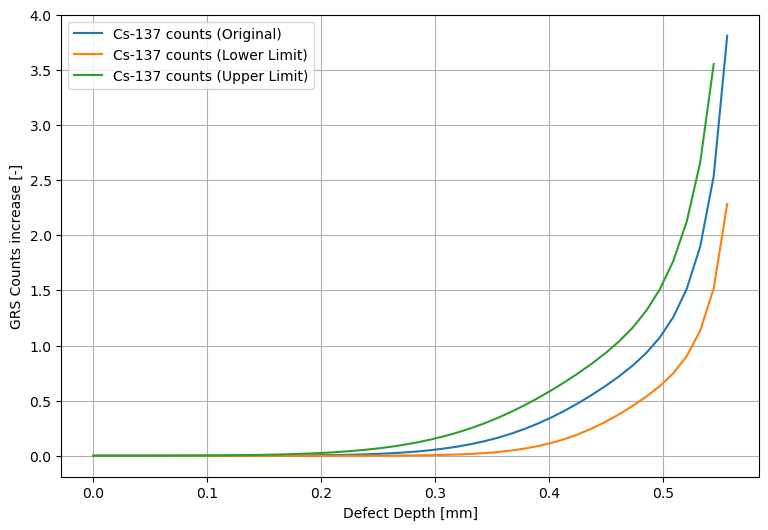

In [130]:
# Plotting
plt.figure(figsize=[9, 6])
plt.plot(defect_depths * 1000, Cs137_meas_values, label='Cs-137 counts (Original)')
plt.plot(defect_depths * 1000, Cs137_meas_values_lower, label='Cs-137 counts (Lower Limit)')
plt.plot(defect_depths * 1000, Cs137_meas_values_upper, label='Cs-137 counts (Upper Limit)')
plt.xlabel('Defect Depth [mm]')
plt.ylabel('GRS Counts increase [-]')
plt.grid()
#plt.xlim(0,0.35)
plt.legend()
plt.show()